## <center>Group 1</center> ###
## <center>Distinguishing Between Benign & Malicous traffic on IOT devices</center> ##
### <center>Parth J. Patel, Dishank K. Solanki, Pawan sp</center> ###

### Loading the packages required for project ###

In [1]:
# Loading the packages needed for this project
# create spark and sparkcontext objects
import pandas as pd 
from pyspark.sql import SparkSession
import numpy as np

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

from pyspark.ml import feature, regression, Pipeline, pipeline, evaluation,classification
from pyspark.sql.functions import lit
from pyspark.sql import types, Row, functions as fn
from pyspark import sql
import matplotlib.pyplot as plt

import pyspark.sql.types as t

from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, OneVsRest



### Reading the data from input files recursively ###

In [2]:
# Please run this notebook from Parth Patel Jupyterhub repository because the input files are stored according to the path mentioned below
# Reading Benign dataset recursively
iot_bot_attacks_benign_1= spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/benign_traffic.csv")
iot_bot_attacks_benign, iot_bot_attacks_benign_2 = iot_bot_attacks_benign_1.randomSplit([0.65, 0.35], seed=0)
print((iot_bot_attacks_benign.count(), len(iot_bot_attacks_benign.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For Benign its 0
# Adding column attack_type for type of attack. For Benign its 0
iot_bot_attacks_benign = iot_bot_attacks_benign.withColumn('ben_malli_attack',lit(0))
iot_bot_attacks_benign = iot_bot_attacks_benign.withColumn('attack_type',lit(0))

# Reading ack dataset recursively
iot_bot_attacks_ack = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/ack.csv")
iot_bot_attacks_ack,iot_bot_attacks_ack_2 = iot_bot_attacks_ack.randomSplit([0.48,0.52],seed=0)
print((iot_bot_attacks_ack.count(), len(iot_bot_attacks_ack.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# Adding column attack_type for type of attack. For ack its 1.
iot_bot_attacks_ack = iot_bot_attacks_ack.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_ack = iot_bot_attacks_ack.withColumn('attack_type',lit(1))

# Reading scan dataset recursively
iot_bot_attacks_scan_1 = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/scan.csv")
iot_bot_attacks_scan, iot_bot_attacks_scan_2 = iot_bot_attacks_scan_1.randomSplit([0.38, 0.62], seed=0)
print((iot_bot_attacks_scan.count(), len(iot_bot_attacks_scan.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# Adding column attack_type for type of attack. For scan its 2.
iot_bot_attacks_scan = iot_bot_attacks_scan.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_scan = iot_bot_attacks_scan.withColumn('attack_type',lit(2))

# Reading udpplain dataset recursively
iot_bot_attacks_udpplain = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/udpplain.csv")
iot_bot_attacks_udpplain,iot_bot_attacks_udpplain_2 = iot_bot_attacks_udpplain.randomSplit([0.62,0.38],seed=0)
print((iot_bot_attacks_udpplain.count(), len(iot_bot_attacks_udpplain.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# Adding column attack_type for type of attack. For udpplain its 3.
iot_bot_attacks_udpplain = iot_bot_attacks_udpplain.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_udpplain = iot_bot_attacks_udpplain.withColumn('attack_type',lit(3))

# Reading udp dataset recursively
iot_bot_attacks_udp_1 = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/udp.csv")
iot_bot_attacks_udp,iot_bot_attacks_udp_2  = iot_bot_attacks_udp_1.randomSplit([0.15, 0.85], seed=0)
print((iot_bot_attacks_udp.count(), len(iot_bot_attacks_udp.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# Adding column attack_type for type of attack. For udp its 4.
iot_bot_attacks_udp = iot_bot_attacks_udp.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_udp = iot_bot_attacks_udp.withColumn('attack_type',lit(4))


# Reading syn dataset recursively
iot_bot_attacks_syn = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/syn.csv")
iot_bot_attacks_syn,iot_bot_attacks_syn_2 = iot_bot_attacks_syn.randomSplit([0.43,0.57],seed=0)
print((iot_bot_attacks_syn.count(), len(iot_bot_attacks_syn.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# Adding column attack_type for type of attack. For syn its 5.
iot_bot_attacks_syn = iot_bot_attacks_syn.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_syn = iot_bot_attacks_syn.withColumn('attack_type',lit(5))


# Reading combo dataset recursively
iot_bot_attacks_combo_1= spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/combo.csv")
iot_bot_attacks_combo, iot_bot_attacks_combo_2 = iot_bot_attacks_combo_1.randomSplit([0.44, 0.56], seed=0)
print((iot_bot_attacks_combo.count(), len(iot_bot_attacks_combo.columns)))
# Adding column attack_type for type of attack. For combo its 6.
iot_bot_attacks_combo = iot_bot_attacks_combo.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_combo = iot_bot_attacks_combo.withColumn('attack_type',lit(6))

# Reading junk dataset recursively
iot_bot_attacks_junk_1= spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/junk.csv")
iot_bot_attacks_junk, iot_bot_attacks_junk_2 = iot_bot_attacks_junk_1.randomSplit([0.9, 0.1], seed=0)
print((iot_bot_attacks_junk.count(), len(iot_bot_attacks_junk.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# Adding column attack_type for type of attack. For junk its 7.
iot_bot_attacks_junk = iot_bot_attacks_junk.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_junk = iot_bot_attacks_junk.withColumn('attack_type',lit(7))


# Reading tcp dataset recursively
iot_bot_attacks_tcp_1 = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/tcp.csv")
iot_bot_attacks_tcp, iot_bot_attacks_tcp_2 = iot_bot_attacks_tcp_1.randomSplit([0.27, 0.73], seed=0)
print((iot_bot_attacks_tcp.count(), len(iot_bot_attacks_tcp.columns)))
# Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# Adding column attack_type for type of attack. For tcp its 8.
iot_bot_attacks_tcp = iot_bot_attacks_tcp.withColumn('ben_malli_attack',lit(1))
iot_bot_attacks_tcp = iot_bot_attacks_tcp.withColumn('attack_type',lit(8))




(100107, 115)
(103650, 115)
(101326, 115)
(104992, 115)
(103207, 115)
(103114, 115)
(101860, 115)
(104636, 115)
(103310, 115)


In [3]:
# Creating the dataset for Unbalanced dataset graph. If you want to see the unbalanced graph please UNCOMMENT this cell and run it
# After running these cell please run "Graph to check number of data points for each attack and for benign and mallicous attack" cell 
# to see the unbalanced data

# # Reading Benign dataset recursively
# iot_bot_attacks_benign= spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/benign_traffic.csv")
# print((iot_bot_attacks_benign.count(), len(iot_bot_attacks_benign.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For Benign its 0
# # Adding column attack_type for type of attack. For Benign its 0
# iot_bot_attacks_benign = iot_bot_attacks_benign.withColumn('ben_malli_attack',lit(0))
# iot_bot_attacks_benign = iot_bot_attacks_benign.withColumn('attack_type',lit(0))

# # Reading combo dataset recursively
# iot_bot_attacks_combo= spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/combo.csv")
# print((iot_bot_attacks_combo.count(), len(iot_bot_attacks_combo.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For combo its 6.
# iot_bot_attacks_combo = iot_bot_attacks_combo.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_combo = iot_bot_attacks_combo.withColumn('attack_type',lit(6))

# # Reading junk dataset recursively
# iot_bot_attacks_junk= spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/junk.csv")
# print((iot_bot_attacks_junk.count(), len(iot_bot_attacks_junk.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For junk its 7.
# iot_bot_attacks_junk = iot_bot_attacks_junk.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_junk = iot_bot_attacks_junk.withColumn('attack_type',lit(7))

# # Reading scan dataset recursively
# iot_bot_attacks_scan = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/scan.csv")
# print((iot_bot_attacks_scan.count(), len(iot_bot_attacks_scan.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For scan its 2.
# iot_bot_attacks_scan = iot_bot_attacks_scan.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_scan = iot_bot_attacks_scan.withColumn('attack_type',lit(2))

# iot_bot_attacks_tcp = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/tcp.csv")
# print((iot_bot_attacks_tcp.count(), len(iot_bot_attacks_tcp.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For tcp its 8.
# iot_bot_attacks_tcp = iot_bot_attacks_tcp.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_tcp = iot_bot_attacks_tcp.withColumn('attack_type',lit(8))

# # Reading udp dataset recursively
# iot_bot_attacks_udp = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/udp.csv")
# print((iot_bot_attacks_udp.count(), len(iot_bot_attacks_udp.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For udp its 4.
# iot_bot_attacks_udp = iot_bot_attacks_udp.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_udp = iot_bot_attacks_udp.withColumn('attack_type',lit(4))

# # Reading ack dataset recursively
# iot_bot_attacks_ack = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/ack.csv")
# print((iot_bot_attacks_ack.count(), len(iot_bot_attacks_ack.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For ack its 1.
# iot_bot_attacks_ack = iot_bot_attacks_ack.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_ack = iot_bot_attacks_ack.withColumn('attack_type',lit(1))

# # Reading syn dataset recursively
# iot_bot_attacks_syn = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/syn.csv")
# print((iot_bot_attacks_syn.count(), len(iot_bot_attacks_syn.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For syn its 5.
# iot_bot_attacks_syn = iot_bot_attacks_syn.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_syn = iot_bot_attacks_syn.withColumn('attack_type',lit(5))

# # Reading udpplain dataset recursively
# iot_bot_attacks_udpplain = spark.read.option("recursiveFileLookup","true").option("header","true").csv("/home/jovyan/library/ist718/Project/Project_1/*/*/udpplain.csv")
# print((iot_bot_attacks_udpplain.count(), len(iot_bot_attacks_udpplain.columns)))
# # Adding column ben_malli_attack for benign or mallicous attack. For mallicous its 1.
# # Adding column attack_type for type of attack. For udpplain its 3.
# iot_bot_attacks_udpplain = iot_bot_attacks_udpplain.withColumn('ben_malli_attack',lit(1))
# iot_bot_attacks_udpplain = iot_bot_attacks_udpplain.withColumn('attack_type',lit(3))

In [4]:
# Merging all the attack dataframe into iot_attacks dataframe
iot_attacks = iot_bot_attacks_benign.union(iot_bot_attacks_combo)
iot_attacks = iot_attacks.union(iot_bot_attacks_junk)
iot_attacks = iot_attacks.union(iot_bot_attacks_scan)
iot_attacks = iot_attacks.union(iot_bot_attacks_tcp)
iot_attacks = iot_attacks.union(iot_bot_attacks_udp)
iot_attacks = iot_attacks.union(iot_bot_attacks_ack)
iot_attacks = iot_attacks.union(iot_bot_attacks_syn)
iot_attacks = iot_attacks.union(iot_bot_attacks_udpplain)

In [5]:
# Checking the rows and columns in the final iot_attacks dataset
print((iot_attacks.count(), len(iot_attacks.columns)))

(926202, 117)


### Creating the list of Column Names ###

In [6]:
ColNames = ['MI_dir_L5_weight','MI_dir_L5_mean','MI_dir_L5_variance','MI_dir_L3_weight','MI_dir_L3_mean','MI_dir_L3_variance',
            'MI_dir_L1_weight','MI_dir_L1_mean','MI_dir_L1_variance','MI_dir_L01_weight','MI_dir_L01_mean','MI_dir_L01_variance',
            'MI_dir_L001_weight','MI_dir_L001_mean','MI_dir_L001_variance','H_L5_weight','H_L5_mean','H_L5_variance','H_L3_weight',
            'H_L3_mean','H_L3_variance','H_L1_weight','H_L1_mean','H_L1_variance','H_L01_weight','H_L01_mean','H_L01_variance',
            'H_L001_weight','H_L001_mean','H_L001_variance','HH_L5_weight','HH_L5_mean','HH_L5_std','HH_L5_magnitude','HH_L5_radius',
            'HH_L5_covariance','HH_L5_pcc','HH_L3_weight','HH_L3_mean','HH_L3_std','HH_L3_magnitude','HH_L3_radius','HH_L3_covariance',
            'HH_L3_pcc','HH_L1_weight','HH_L1_mean','HH_L1_std','HH_L1_magnitude','HH_L1_radius','HH_L1_covariance','HH_L1_pcc',
            'HH_L01_weight','HH_L01_mean','HH_L01_std','HH_L01_magnitude','HH_L01_radius','HH_L01_covariance','HH_L01_pcc',
            'HH_L001_weight','HH_L001_mean','HH_L001_std','HH_L001_magnitude','HH_L001_radius','HH_L001_covariance','HH_L001_pcc',
            'HH_jit_L5_weight','HH_jit_L5_mean','HH_jit_L5_variance','HH_jit_L3_weight','HH_jit_L3_mean','HH_jit_L3_variance',
            'HH_jit_L1_weight','HH_jit_L1_mean','HH_jit_L1_variance','HH_jit_L01_weight','HH_jit_L01_mean','HH_jit_L01_variance',
            'HH_jit_L001_weight','HH_jit_L001_mean','HH_jit_L001_variance','HpHp_L5_weight','HpHp_L5_mean','HpHp_L5_std',
            'HpHp_L5_magnitude','HpHp_L5_radius','HpHp_L5_covariance','HpHp_L5_pcc','HpHp_L3_weight','HpHp_L3_mean','HpHp_L3_std',
            'HpHp_L3_magnitude','HpHp_L3_radius','HpHp_L3_covariance','HpHp_L3_pcc','HpHp_L1_weight','HpHp_L1_mean','HpHp_L1_std',
            'HpHp_L1_magnitude','HpHp_L1_radius','HpHp_L1_covariance','HpHp_L1_pcc','HpHp_L01_weight','HpHp_L01_mean','HpHp_L01_std',
            'HpHp_L01_magnitude','HpHp_L01_radius','HpHp_L01_covariance','HpHp_L01_pcc','HpHp_L001_weight','HpHp_L001_mean',
            'HpHp_L001_std','HpHp_L001_magnitude','HpHp_L001_radius','HpHp_L001_covariance','HpHp_L001_pcc','ben_malli_attack',
            'attack_type']

In [7]:
iot_attacks = iot_attacks.toDF(*ColNames)

### Checking the datatypes for each column in iot_attacks dataset ###

In [8]:
iot_attacks.dtypes

[('MI_dir_L5_weight', 'string'),
 ('MI_dir_L5_mean', 'string'),
 ('MI_dir_L5_variance', 'string'),
 ('MI_dir_L3_weight', 'string'),
 ('MI_dir_L3_mean', 'string'),
 ('MI_dir_L3_variance', 'string'),
 ('MI_dir_L1_weight', 'string'),
 ('MI_dir_L1_mean', 'string'),
 ('MI_dir_L1_variance', 'string'),
 ('MI_dir_L01_weight', 'string'),
 ('MI_dir_L01_mean', 'string'),
 ('MI_dir_L01_variance', 'string'),
 ('MI_dir_L001_weight', 'string'),
 ('MI_dir_L001_mean', 'string'),
 ('MI_dir_L001_variance', 'string'),
 ('H_L5_weight', 'string'),
 ('H_L5_mean', 'string'),
 ('H_L5_variance', 'string'),
 ('H_L3_weight', 'string'),
 ('H_L3_mean', 'string'),
 ('H_L3_variance', 'string'),
 ('H_L1_weight', 'string'),
 ('H_L1_mean', 'string'),
 ('H_L1_variance', 'string'),
 ('H_L01_weight', 'string'),
 ('H_L01_mean', 'string'),
 ('H_L01_variance', 'string'),
 ('H_L001_weight', 'string'),
 ('H_L001_mean', 'string'),
 ('H_L001_variance', 'string'),
 ('HH_L5_weight', 'string'),
 ('HH_L5_mean', 'string'),
 ('HH_L5_st

### Casting each column from iot_attacks dataset into float ###

In [9]:
for col in iot_attacks.columns:
    iot_attacks = iot_attacks.withColumn(col, iot_attacks[col].cast(t.FloatType()))

### Counting the datapoint for each type of attack ###

In [10]:
attack=iot_attacks.groupBy('attack_type').agg(fn.count('attack_type').alias('attackCount')).toPandas()
attack=attack.sort_values('attack_type').reset_index(drop=True)
attack

,attack_type,attackCount
0,0.0,100107
1,1.0,103650
2,2.0,101326
3,3.0,104992
4,4.0,103207
5,5.0,103114
6,6.0,101860
7,7.0,104636
8,8.0,103310


### Graph to check number of data points for each attack and for benign and mallicous attack ###

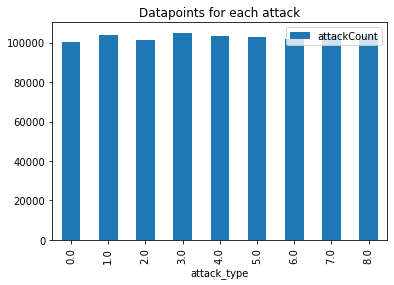

In [11]:
attack.plot.bar(x = 'attack_type', y='attackCount', title = 'Datapoints for each attack');

In [12]:

bin_attack=iot_attacks.groupBy('ben_malli_attack').agg(fn.count('ben_malli_attack').alias('attackCount')).toPandas()
bin_attack=bin_attack.sort_values('ben_malli_attack').reset_index(drop=True)
bin_attack

,ben_malli_attack,attackCount
0,0.0,100107
1,1.0,826095


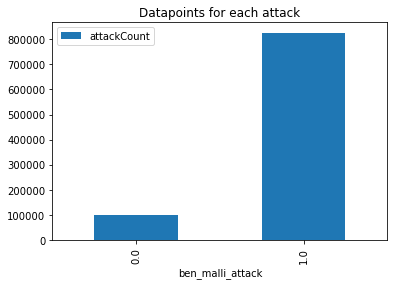

In [13]:
bin_attack.plot.bar(x = 'ben_malli_attack', y='attackCount', title = 'Datapoints for each attack');

### Removing the label columns from the list of column names ###

In [14]:
ColNames = ColNames[0:115]
len(ColNames)

115

### Defining Various resources which we will need for classification. Logistic for Binary classification and Random Forest for Multinomial classification. ###

In [15]:
va = feature.VectorAssembler(inputCols=ColNames, outputCol="unfeatures")
sc = feature.StandardScaler(inputCol="unfeatures",outputCol="features")
lg = LogisticRegression().setLabelCol('ben_malli_attack').setFeaturesCol('features')
rf = RandomForestClassifier().setLabelCol('attack_type').setFeaturesCol('features')


training_df, validation_df, testing_df = iot_attacks.randomSplit([0.7, 0.2, 0.1], seed=0)



multi_eval = evaluation.MulticlassClassificationEvaluator(labelCol = 'attack_type')# add auc
binary_eval = evaluation.BinaryClassificationEvaluator(labelCol='ben_malli_attack')



### Splitting the dataset for cross validation ###

In [16]:
[training_df.count(),validation_df.count(),testing_df.count()]

[648019, 185393, 92790]

## <center>Logistic Regression and Random Forest for Binary Classification</center> ##

### Binary Classification of Benign and Malicious attack ###

In [17]:
pipe_logis_1 = Pipeline(stages = [va,sc,lg.setRegParam(0.1).setElasticNetParam(0.2)]).fit(training_df)
pipe_logis_2 = Pipeline(stages = [va,sc,lg.setRegParam(0.2).setElasticNetParam(0.4)]).fit(training_df)
pipe_logis_3 = Pipeline(stages = [va,sc,lg.setRegParam(0.3).setElasticNetParam(0.5)]).fit(training_df)
pipe_random_3 = Pipeline(stages=[va,sc,rf.setMaxDepth(30).setImpurity('gini').setNumTrees(100).setLabelCol('ben_malli_attack')]).fit(training_df)

### Checking the weights for different logistic regression model ###

In [18]:
pd.DataFrame(list(zip(training_df.columns[0:116], pipe_logis_1.stages[-1].coefficients.toArray())),
            columns = ['column', 'weight']).sort_values('weight')[-10:]

,column,weight
3,MI_dir_L3_weight,0.167714
21,H_L1_weight,0.173757
6,MI_dir_L1_weight,0.173757
24,H_L01_weight,0.179064
9,MI_dir_L01_weight,0.179064
69,HH_jit_L3_mean,0.226523
66,HH_jit_L5_mean,0.226552
72,HH_jit_L1_mean,0.232260
75,HH_jit_L01_mean,0.267754
78,HH_jit_L001_mean,0.275829


### Checking the weights for different Random Forest model ###

In [19]:
pd.DataFrame(list(zip(training_df.columns[0:116], pipe_random_3.stages[-1].featureImportances.toArray())),
            columns = ['column', 'weight']).sort_values('weight')[-10:]

,column,weight
110,HpHp_L001_std,0.027091
112,HpHp_L001_radius,0.027303
12,MI_dir_L001_weight,0.028918
13,MI_dir_L001_mean,0.036558
3,MI_dir_L3_weight,0.038413
113,HpHp_L001_covariance,0.039889
53,HH_L01_std,0.045320
62,HH_L001_radius,0.058295
60,HH_L001_std,0.072743
78,HH_jit_L001_mean,0.122751


In [22]:
#pipe_logis_2.stages[-1].coefficients

### Plotting the ROC curve for above 3 logistic regression model ###

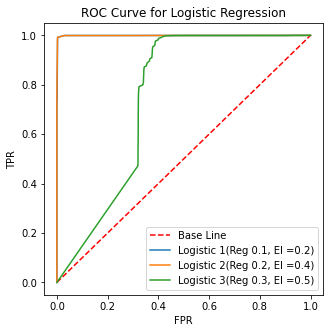

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(pipe_logis_1.stages[-1].summary.roc.select('FPR').collect(),
         pipe_logis_1.stages[-1].summary.roc.select('TPR').collect())
plt.plot(pipe_logis_2.stages[-1].summary.roc.select('FPR').collect(),
         pipe_logis_2.stages[-1].summary.roc.select('TPR').collect())
plt.plot(pipe_logis_3.stages[-1].summary.roc.select('FPR').collect(),
         pipe_logis_3.stages[-1].summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve for Logistic Regression")
plt.legend(["Base Line","Logistic 1(Reg 0.1, El =0.2)","Logistic 2(Reg 0.2, El =0.4)","Logistic 3(Reg 0.3, El =0.5)"])
plt.show()


### Creating the function to calculate accuracy, recall, precision and f-1 score on the test data ### 

In [24]:
# Note the function needs a testing df to be present. 

def GetPerformanceLogistic(pipe_logis):
    predict_df=pipe_logis.transform(testing_df).select('ben_malli_attack','prediction')
    # get predictions on testing data set and selecting only the required columns 


    # The code below create a column which checks for each condition to hold true or not. 
    # After doing this I realized we could have just used toPandas and done it in simpler way. 

    predict_df=predict_df.withColumn('TP',fn.when((fn.col('ben_malli_attack')==1)&(fn.col('prediction')==1),1).otherwise(0))
    predict_df=predict_df.withColumn('FP',fn.when((fn.col('ben_malli_attack')==0)&(fn.col('prediction')==1),1).otherwise(0))
    predict_df=predict_df.withColumn('TN',fn.when((fn.col('ben_malli_attack')==0)&(fn.col('prediction')==0),1).otherwise(0))
    predict_df=predict_df.withColumn('FN',fn.when((fn.col('ben_malli_attack')==1)&(fn.col('prediction')==0),1).otherwise(0))

    sums = predict_df.groupBy().sum().toPandas()
    # Takes the sums of all cases to get TP,FP,TN,FN from the predict_df

    # Just extracting the values
    TP = sums['sum(TP)']
    FP = sums['sum(FP)']
    TN = sums['sum(TN)']
    FN = sums['sum(FN)']

    # basic formulaes.
    precision = (TP/(TP+FP))[0]
    recall = (TP/(TP+FN))[0]
    f1_score = (2*(precision*recall))/(precision+recall)
                                       
    accu = ((TP +TN)/(FP+FN+TP+TN))[0]
    performanceArray = [accu,f1_score,precision,recall]
    
    TP,TN,FP,FN = None,None,None,None
    print(performanceArray)
    return performanceArray
    
    
    

#training_df.groupBy('ben_malli_attack').agg(fn.count('ben_malli_attack').alias('count')).toPandas()   
#testing_df.groupBy('ben_malli_attack').agg(fn.count('ben_malli_attack').alias('count')).toPandas()

#print('errors',(FP+FN)[0])


### Comparing different logistic regression model based on AUC using the validation data.  ###

In [25]:
AUC1 = binary_eval.evaluate(pipe_logis_1.transform(validation_df))
AUC2 = binary_eval.evaluate(pipe_logis_2.transform(validation_df)) 
AUC3 = binary_eval.evaluate(pipe_logis_3.transform(validation_df))

AUCrf = binary_eval.evaluate(pipe_random_3.transform(validation_df))

In [52]:
print("Model 1 logistic (Reg = 0.1, Elastic net = 0.2) AUC: ", AUC1)
print("Model 2 logistic (Reg = 0.2, Elastic net = 0.4) AUC: ", AUC2)
print("Model 3 logistic (Reg = 0.3, Elastic net = 0.5) AUC: ", AUC3)
print("Model for binary Random forest (Max Depth 30, NumTrees 100) AUC:",AUCrf)

Model 1 logistic (Reg = 0.1, Elastic net = 0.2) AUC:  0.9990245984562174
Model 2 logistic (Reg = 0.2, Elastic net = 0.4) AUC:  0.9989186704427166
Model 3 logistic (Reg = 0.3, Elastic net = 0.5) AUC:  0.7516791661142378
Model for binary Random forest (Max Depth 30, NumTrees 100) AUC: 0.9999999723008617


### Getting the Accuracy, F_1 Score, Recall and precision for each model using our function ###

In [27]:
GetPerformanceLogistic(pipe_logis_1)

[0.9981140209074254, 0.998943192043142, 0.9988889023079431, 0.9989974876799691]


[0.9981140209074254, 0.998943192043142, 0.9988889023079431, 0.9989974876799691]

In [28]:
GetPerformanceLogistic(pipe_logis_2)

[0.8985127707727126, 0.9461802678127483, 0.8979941636562849, 0.9998309015363803]


[0.8985127707727126,
 0.9461802678127483,
 0.8979941636562849,
 0.9998309015363803]

In [29]:
GetPerformanceLogistic(pipe_logis_3)

[0.8922513201853648, 0.9430579444362178, 0.8922513201853648, 1.0]


[0.8922513201853648, 0.9430579444362178, 0.8922513201853648, 1.0]

In [30]:
GetPerformanceLogistic(pipe_random_3)

[0.9999461148830693, 0.9999698029339469, 1.0, 0.9999396076915644]


[0.9999461148830693, 0.9999698029339469, 1.0, 0.9999396076915644]

### MultiNomial Classification to classify type of attacks ###

In [31]:
def accuracyMulti(pipeline):
    pred_df=pipeline.transform(testing_df).select('attack_type','prediction')
    pred_df = pred_df.withColumn('Correctly Classified',fn.when((fn.col('attack_type')==fn.col('prediction')),1).otherwise(0))
    return pred_df.select('Correctly Classified').groupBy('Correctly Classified').agg(fn.count('Correctly Classified'))

In [32]:
#pipe_random_1 = Pipeline(stages=[va,sc,rf.setMaxDepth(10).setImpurity('gini').setNumTrees(40)]).fit(training_df)
#print(multi_eval.evaluate(pipe_random_1.transform(validation_df)))
# using F1-score

pipe_random_2 = Pipeline(stages=[va,sc,rf]).fit(training_df)
print(multi_eval.evaluate(pipe_random_2.transform(validation_df)))


0.13237416317954911


In [42]:
accuracyMulti(pipe_random_2).show()

+--------------------+---------------------------+
|Correctly Classified|count(Correctly Classified)|
+--------------------+---------------------------+
|                   1|                      20539|
|                   0|                      72251|
+--------------------+---------------------------+



In [43]:
pred_df = pipe_random_2.transform(testing_df)

In [53]:
#pred_df.limit(10).toPandas()
20539/(20539+72251)

0.22134928332794482

In [45]:
#print(multi_eval.evaluate(pipe_random_1.transform(validation_df)))

print(multi_eval.evaluate(pipe_random_2.transform(validation_df)))


0.13237416317954911


In [46]:
#accuracyMulti(pipe_random_1).show()

In [47]:
accuracyMulti(pipe_random_2).show()

+--------------------+---------------------------+
|Correctly Classified|count(Correctly Classified)|
+--------------------+---------------------------+
|                   1|                      20539|
|                   0|                      72251|
+--------------------+---------------------------+



## <center> MultiLayer Perceptron Classifier</center> ##

### Multinomial classification to classify different type of attack ###

In [39]:
deepL = classification.MultilayerPerceptronClassifier(seed=0).\
    setStepSize(0.01).\
    setMaxIter(400).\
    setFeaturesCol('features').\
    setLabelCol('attack_type').\
    setLayers([115,40,40,15,9])

In [ ]:
deep_pipe = Pipeline(stages=[va,sc,deepL]).fit(training_df)

### Calculating the accuracy of neural network model ###

In [49]:
accuracyMulti(deep_pipe).show()

+--------------------+---------------------------+
|Correctly Classified|count(Correctly Classified)|
+--------------------+---------------------------+
|                   1|                      82578|
|                   0|                      10212|
+--------------------+---------------------------+



In [50]:
multi_eval.evaluate(deep_pipe.transform(validation_df))

0.8748959529843214

In [51]:
deep_pipe.transform(testing_df).select(fn.expr('avg(float(attack_type=prediction))').alias('accuracy')).show()

+------------------+
|          accuracy|
+------------------+
|0.8899450371807307|
+------------------+



### Stuff below is not part of the Final submission is just things we tried. ###

### Gradient Boosting Machine. ###

In [ ]:
gb = GBTClassifier(stepSize=0.01,maxIter=500).setFeaturesCol("features").setLabelCol('ben_malli_attack')

In [ ]:
#gbt_pipe = Pipeline(stages=[va,sc,gb]).fit(training_df)

In [ ]:
gbt_pipe_2 = Pipeline(stages=[va,sc,gb]).fit(training_df)

In [ ]:
gbt_pipe_2.transform(testing_df).select(fn.expr('avg(float(attack_type=prediction))').alias('accuracy')).show()

In [ ]:
multi_eval.evaluate(gbt_pipe_2.transform(validation_df))

### One Vs Rest Model. (Takes too long/ Not tested) ###

In [ ]:

gb = GBTClassifier(stepSize=0.1,maxIter=50).setFeaturesCol("features")

ovr = OneVsRest(classifier=gb).setLabelCol("attack_type")

ovrModel = Pipeline(stages=[va,sc,ovr]).fit(training_df)

In [ ]:
ovrModel.transform(validation_df).select(fn.expr('avg(float(attack_type=prediction))').alias('accuracy')).show()

In [ ]:
multi_eval.evaluate(ovrModel.transform(validation_df))

#### Was not able to run xGBoost

- Run the following script in python terminal. 

%sh

git clone https://github.com/sllynn/spark-xgboost.git;

cd spark-xgboost;

pip install -e .;

- If it still throws import error for xgboost then restart python by running this and then kernel restart 
 
 dbutils.library.restartPython()
 

- Library and run code. 

In [ ]:

# from sparkxgb import XGBoostClassifier, XGBoostClassificationModel
# from pyspark.sql.types import StringType

 

# from pyspark.ml import Pipeline

# from pyspark.ml.feature import StringIndexer, VectorAssembler

# from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# import mlflow

# import mlflow.spark

# xgbPipe = Pipeline(stages=[va,sc]).fit(training_df)

# transformed_df = xgbPipe.transform(training_df)


# xgb = XGBoostClassifier(eta=0.1,maxDepth=10,missing=-999,objective="multi:softprob",numClass=9,numWorkers=2,featuresCol="features",labelCol="attack_type")

